In [8]:
#import library
import pandas as pd

pd.options.display.max_columns = 50 #digunakan untuk mempermudah penampilan row data

#import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

#Tampilkan jumlah baris dan kolom
print(df_load.shape)

#Tampilkan 5 data teratas
print(df_load.head())

#Jumlah ID yang unik
df_load.customerID.nunique()

(7113, 22)
   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  DeviceProtection TechSupport St

7017

(7113, 22)
   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  DeviceProtection TechSupport St

7017

### Memfilter ID Number Pelanggan Format Tertentu


Mencari format ID Number (Phone Number) Pelanggan customerID yang benar, dengan kriteria:

- Panjang karakter adalah 11-12.

- Terdiri dari angka Saja, tidak diperbolehkan ada karakter selain angka

- Diawali dengan angka 45 2 digit pertama.

In [9]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis=1)
print('Hasil jumlah ID Customer yang terfilter adalah ', df_load['customerID'].count())


Hasil jumlah ID Customer yang terfilter adalah  7006
Hasil jumlah ID Customer yang terfilter adalah  7006


### Memfilter Duplikasi ID Number Pelanggan

In [10]:
# drop duplicates rows
df_load.drop_duplicates()

# drop duplicates ID sorted by period
df_load = df_load.sort_values('UpdatedAt', ascending = False).drop_duplicates('customerID')

print('Hasil jumlah ID customer yang sudah dihilangkan duplikasinya (distinct) adalah', df_load['customerID'].count())

Hasil jumlah ID customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993
Hasil jumlah ID customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


Validitas dari ID Number pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar. Berdasarkan hasil tersebut, terdapat perbedaan jumlah nomor ID dari data pertama kali di load sampai dengan hasil akhir. Jumlah row data ketika pertama kali di load ada sebanyak 7113 rows dan 22 columns dengan 7017 jumlah ID yang unique. Kemudian setelah di cek validitas dari ID pelanggan, maka tersisa 6993 rows data

In [11]:
df_load

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4727,202006,45315483266,Male,0,Yes,No,60.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.50,1198.80,No
4738,202006,45236961615,Male,0,No,No,5.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,104.10,541.90,Yes
4737,202006,45929827382,Female,0,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.50,8312.75,No
4736,202006,45305082233,Female,0,Yes,Yes,56.0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),81.25,4620.40,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,202006,45184632574,Female,1,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.15,70.15,Yes
2367,202006,45023517923,Female,0,No,No,1.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.55,85.55,Yes
2368,202006,45665022680,Female,0,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.15,8529.50,No
2369,202006,45957014561,Male,0,No,No,64.0,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),99.25,6549.45,No


,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4727,202006,45315483266,Male,0,Yes,No,60.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.50,1198.80,No
4738,202006,45236961615,Male,0,No,No,5.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,104.10,541.90,Yes
4737,202006,45929827382,Female,0,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.50,8312.75,No
4736,202006,45305082233,Female,0,Yes,Yes,56.0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),81.25,4620.40,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,202006,45184632574,Female,1,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.15,70.15,Yes
2367,202006,45023517923,Female,0,No,No,1.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.55,85.55,Yes
2368,202006,45665022680,Female,0,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.15,8529.50,No
2369,202006,45957014561,Male,0,No,No,64.0,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),99.25,6549.45,No


### Mengatasi Missing Values dengan Penghapusan Rows

In [12]:
# Total Missing values kolom Churn
print('Total missing values data dari kolom Churn', df_load['Churn'].isnull().sum())

# drop all rows with spesific column
df_load.dropna(subset =['Churn'],inplace=True)

print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah', df_load.shape)

Total missing values data dari kolom Churn 43
Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)
Total missing values data dari kolom Churn 43
Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


### Mengatasi Missing Values Dengan Pengisian Tertentu


- Tenure pihak data modeller meminta setiap rows yang memiliki missing values untuk lama berlangganan di isi dengan 11.
- Variable yang bersifat numeric selain Tenure di isi dengan median dari masing-masing variable tersebut.

In [13]:
print('Status Missing Values :',df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

#handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

#Loop
#Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
    #write your command here
	median = df_load[col_name].median()
	df_load[col_name].fillna(median, inplace=True)

    
print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
MonthlyCharges      26
TotalCharges        15
Churn                0
InternetService      0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
UpdatedAt            0
dtype: int64

Jumlah Missing Values setelah di imputer datanya, adalah:
Churn               0
TotalCharges        0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV

Setelah kita analisis lebih lanjut, ternyata masih ada missing values dari data yang kita sudah validkan Id Number pelanggannya. Missing values terdapat pada kolom Churn, tenure, MonthlyCharges & TotalCharges. Setelah kita tangani dengan cara penghapusan rows dan pengisian rows dengan nilai tertentu, terbukti sudah tidak ada missing values lagi pada data, terbukti dari jumlah missing values masing-masing variable yang bernilai 0. 

### Mendeteksi adanya Outlier (Boxplot)


Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


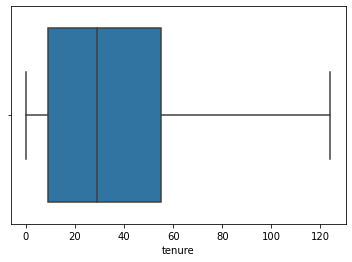

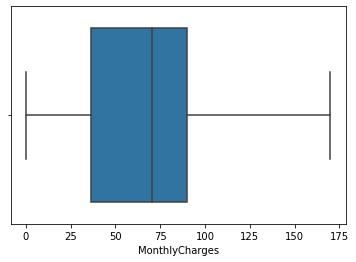

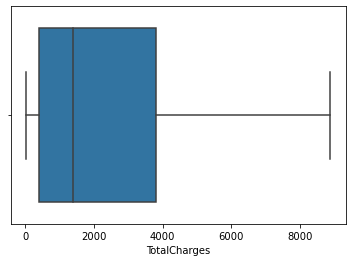

In [23]:
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Misal untuk kolom tenure
plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()
# dan seterusnya untuk kedua kolom yang tersisa secara berurut

plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

### Mengatasi Outliers

Setelah kita mengetahui variable mana saja yang terdapat pencilan (outlier), selanjutnya kita akan atasi outlier dengan menggunakan metode interquartile range (IQR).

In [22]:
Q1 = (df_load[['tenure','MonthlyCharges', 'TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)

minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


### Kesimpulan

Dari ketiga boxplot dengan variable 'tenure','MonthlyCharges' & 'TotalCharges' terlihat jelas bahwasannya ada outlier. Hal ini bisa di identifikasi dari adanya titik-titik yang berada jauh dari gambar boxplot-nya. Kemudian kalau kita liat persebaran datanya dari kolom max nya juga ada nilai yang sangat tinggi sekali.

Kemudian nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai maximum & minimum dari interquartile range (IQR). Setelah di tangani outlier-nya, dan dilihat perseberan datanya, terlihat sudah tidak ada lagi nilai yang outlier.

